# Project Overview

# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record



# Problem Statement 

### The data set contains records of multiple offers. The portofolio, profile and transcript data needs to be combined and analysed. The problem which needs to be solved is:-
### A) Descriptive Statistics
#### 1) Analyse the best age-range, income range for each offer type
#### 2) Analyse the offer-successfull percentage
#### 3) Analyse the average-amount spent for each offer-type where the offer was successfull
#### 4) Analyse the best offers for each age-range, income-range, customer joined date
#### 5) Analyse the offer completion rate for each age-range and income range
### B) Predictive Modeling- Machine Learning
#### 1) Predict the offer successfull rate
#### 2) Predict the amount spent by the customers during offer duartion period.
### C) Recommendations
#### 1) Rank-based - For new users
#### 2) User-User based collaborative filtering- for users who have successfully completed atleast 1 offer

# Metrics used to measure performance of the model
### A) For Classification model:
#### 1) Accuracy score - to measure the accuracy of the model
#### 2) F1 score - to measure the balance between precision and recall
### B) For Regression model:
#### 1) Mean-absolute-error - to measure the mean average error in the model
#### 2) Median-absolute-error - to measure the meadian average error

In [61]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
#% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, median_absolute_error
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data understanding and cleaning

In [62]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### Protfolio data needs to be cleaned for analysis

In [63]:
#encoding the channels in to 1s and 0s
channels = ['web', 'email', 'mobile', 'social']
for channel in channels:
    portfolio[channel] = portfolio.channels.apply(lambda x: channel in x)*1
    
#droping the channels column
portfolio.drop('channels', axis=1, inplace=True)

In [64]:
# Creating a new column in the dataframe  with concatinating the offer_type with rewards, difficulty and duration
portfolio['offer_name'] = portfolio.offer_type + "_" + portfolio.reward.astype(str) + "_" + portfolio.difficulty.astype(str) + "_" + portfolio.duration.astype(str)
portfolio.rename(columns={"id": "offer_id"}, inplace=True)

In [65]:
portfolio

,reward,difficulty,duration,offer_type,offer_id,web,email,mobile,social,offer_name
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,bogo_10_10_7
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo_10_10_5
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0,informational_0_0_4
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,bogo_5_5_7
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,discount_5_20_10
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_3_7_7
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_2_10_10
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,informational_0_0_3
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo_5_5_5
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,discount_2_10_7


In [66]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [67]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
gender              14825 non-null object
age                 17000 non-null int64
id                  17000 non-null object
became_member_on    17000 non-null int64
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [68]:
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [69]:
profile.isna().sum() * 100 / profile.shape[0]

gender              12.794118
age                  0.000000
id                   0.000000
became_member_on     0.000000
income              12.794118
dtype: float64

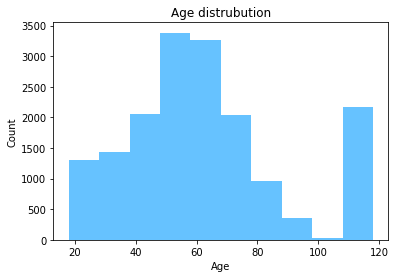

In [70]:
# ploting the age distribution in the profile data
plt.hist(data = profile , x='age',color = '#66c2ff')
plt.title('Age distrubution');
plt.xlabel('Age');
plt.ylabel('Count');

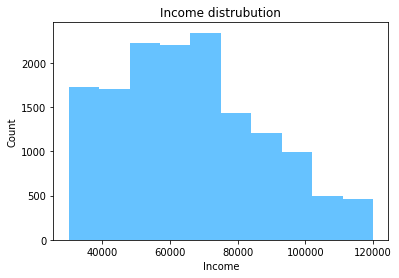

In [71]:
# ploting the income distribution in the profile data
plt.hist(data = profile , x='income',color = '#66c2ff')
plt.title('Income distrubution');
plt.xlabel('Income');
plt.ylabel('Count');

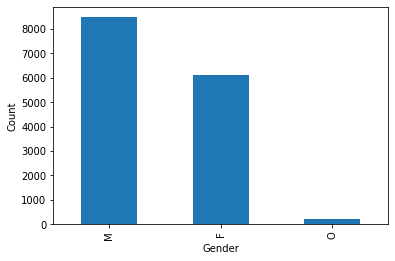

In [72]:
# ploting the gender counts
profile.gender.value_counts().plot(kind='bar')
plt.xlabel('Gender');
plt.ylabel('Count');

In [73]:
profile.id.value_counts().count()

17000

In [74]:
profile[profile['age'] >= 118].count()

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

In [134]:
profile[profile['age'] == 118].isna().sum()

gender              2175
age                    0
customer_id            0
became_member_on       0
income              2175
dtype: int64

### The profile data contains many age values equal to 118. This may be due the entry error or some customers may not want to reveal their age. As these customers with this age data contains many Nan values, it makes sense to drop these rows.

In [75]:
# converting the became_member_on column to datetime
profile['became_member_on'] = profile.became_member_on.apply(lambda x: str(x))
profile['became_member_on'] = pd.to_datetime(profile.became_member_on)
profile.rename(columns={"id": "customer_id"}, inplace=True)

### Converted became_member_on column to datetime for plotting the distribution graph

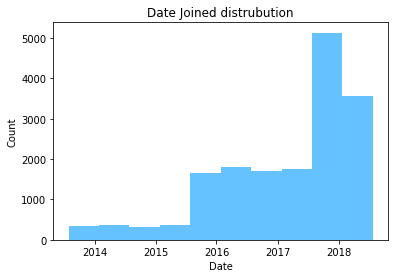

In [76]:
# ploting the date joined distribution in the profile data
plt.hist(data = profile , x='became_member_on',color = '#66c2ff')
plt.title('Date Joined distrubution');
plt.xlabel('Date');
plt.ylabel('Count');

In [77]:
profile.head()

,gender,age,customer_id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN


In [78]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


### Transcript data has records some abnormalities. In the event column, the value is set to offer completed even if customer completes the offer without viewing it. This issue needs to be solved while combing all the data in to a single dataframe.

In [79]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

### Transcript data contains offers events and transactions in the same column, need to  add the amount in seperate column.

In [80]:
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [81]:
transcript[transcript['event'] != 'transaction']['person'].count() * 100 / transcript.shape[0]

54.66962881768417

In [82]:
# converting time
transcript['time'] = transcript.time / 24.0
# renaming the column
transcript.rename(columns={"person": "customer_id"}, inplace=True)

In [83]:
# function to seperate the offer_id
def create_offer_id_col(val):
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]
    
# function to seperate the amount
def create_amount_col(val):
    if list(val.keys())[0] in ['amount']:
        return list(val.values())[0]
    
transcript['offer_id'] = transcript.value.apply(create_offer_id_col)
transcript['amount'] = transcript.value.apply(create_amount_col)
transcript.amount.astype('float')
transcript.drop(columns=['value'], inplace=True)

### Cleaned the Transcript data by seperating offer_id and amount

In [84]:
transcript

,customer_id,event,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer received,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer received,0.00,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0.00,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer received,0.00,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN
...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,29.75,None,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,29.75,None,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,29.75,None,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,29.75,None,3.53


In [85]:
transcript.duplicated().sum()

397

In [86]:
# drop the duplicated value, and reset the index
transcript.drop_duplicates(inplace=True)
transcript.reset_index(drop=True, inplace=True)

In [87]:
transaction_df = transcript[transcript.event=='transaction'].copy()
transaction_df.drop(columns=['offer_id', 'event'], inplace=True)

### Created a transactions_df from transcript data to get only rows whith transactions

In [88]:
transaction_df

,customer_id,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,0.00,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.00,34.56
12659,54890f68699049c2a04d415abc25e717,0.00,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,0.00,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,0.00,18.97
...,...,...,...
306132,b3a1272bc9904337b331bf348c3e8c17,29.75,1.59
306133,68213b08d99a4ae1b0dcb72aebd9aa35,29.75,9.53
306134,a00058cf10334a308c68e7631c529907,29.75,3.61
306135,76ddbd6576844afe811f1a3c0fbb5bec,29.75,3.53


In [89]:
offers_df = transcript[transcript.event != 'transaction'].copy()

# one-hot encode offer event
offers_df['received'] = offers_df.event.apply(lambda x: 1 if x == 'offer received' else 0)
offers_df['completed'] = offers_df.event.apply(lambda x: 1 if x == 'offer completed' else 0)
offers_df['viewed'] = offers_df.event.apply(lambda x: 1 if x == 'offer viewed' else 0)

offers_df.drop(columns=['event', 'amount'], inplace=True)

### Created offers_df to from the transcript data to get the rows where offer is received, viewed or cmpleted

In [90]:
offers_df

,customer_id,time,offer_id,received,completed,viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0
2,e2127556f4f64592b11af22de27a7932,0.00,2906b810c7d4411798c6938adc9daaa5,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0.00,fafdcd668e3743c1bb461111dcafc2a4,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0.00,4d5c57ea9a6940dd891ad53e9dbe8da0,1,0,0
...,...,...,...,...,...,...
306100,a6f84f4e976f44508c358cc9aba6d2b3,29.75,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1,0
306109,b895c57e8cd047a8872ce02aa54759d6,29.75,fafdcd668e3743c1bb461111dcafc2a4,0,1,0
306110,8dda575c2a1d44b9ac8e8b07b93d1f8e,29.75,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1
306112,8431c16f8e1d440880db371a68f82dd0,29.75,fafdcd668e3743c1bb461111dcafc2a4,0,1,0


## Data Preprocessing

### Portfolio, Profile, Offers_df and Transactions_df data is merged below 

## The cell below may take 20-25 minutes to execute. You may skip 12 cells below and directly load the saved combined  dataframe

In [91]:
# combing the offers_df, transaction_df, portofolio and profile dataframe

data = []

#get the unique customers from the offers_df
customer_ids = offers_df['customer_id'].unique()

# loop through the customer ids in the offer dataframe
for x in range(len(customer_ids)):
    
    # get customer id from the list
    cust_id = customer_ids[x]
        
    # extract customer profile from profile data
    customer = profile[profile['customer_id'] == cust_id]
    
    # extract offers associated with the customer from offers_df
    customer_offer_data = offers_df[offers_df['customer_id'] == cust_id]
        
    # extract transactions associated with the customer from transactions_df
    customer_transaction_data = transaction_df[transaction_df['customer_id'] == cust_id]
    
    # extract received, completed, viewed offer data from customer offers
    offer_received_data = customer_offer_data[customer_offer_data['received'] == 1]
    offer_completed_data = customer_offer_data[customer_offer_data['completed'] == 1]
    offer_viewed_data = customer_offer_data[customer_offer_data['viewed'] == 1]
        
    rows = []
    # loop through each received offer
    for i in range(offer_received_data.shape[0]):
        
        # fetch an offer id 
        offer_id = offer_received_data.iloc[i]['offer_id']
         
        # extract offer row from portfolio
        offer_row = portfolio.loc[portfolio['offer_id'] == offer_id]
        
        # extract duration days of an offer from offer row
        duration_days = offer_row['duration'].values[0]
        
        # initialize start and end time of an offer
        start_time = offer_received_data.iloc[i]['time']
        end_time = start_time + duration_days
        
        # seggregate offers completed within end date
        offer_completed_withintime = np.logical_and(
            offer_completed_data['time'] >= start_time, offer_completed_data['time'] <= end_time)
    
        # seggregate offers viewed within end date
        offer_viewed_withintime = np.logical_and(
            offer_viewed_data['time'] >= start_time, offer_viewed_data['time'] <=end_time)
        
        # flag offer_successful to 1 if an offer is viewed and completed within end time else to 0
        offer_successful = offer_completed_withintime.sum() > 0 and offer_viewed_withintime.sum() > 0
        
        # flag offer_successful_without_view to 1 if an offer is not viewed and completed within end time else to 0
        offer_successful_without_view = offer_completed_withintime.sum() > 0 and  offer_viewed_withintime.sum() ==  0
        
        # extract transactions occured within time
        transaction_withintime = np.logical_and(
            customer_transaction_data['time'] >= start_time, customer_transaction_data['time'] <= end_time)
        
        #transaction data within the offer end time
        transaction_data = customer_transaction_data[transaction_withintime]
        
        # total amount spent by a customer from given offers
        transaction_total_amount = transaction_data['amount'].sum()
        
        row = {
                'offer_id': offer_id,
                'customer_id': cust_id,
                'time': start_time,
                'amount': transaction_total_amount,
                'offer_successful': int(offer_successful),
                'offer_successful_without_viewing': int(offer_successful_without_view),
            }
        
            
        row.update(offer_row.iloc[0,0:].to_dict())

        row.update(customer.iloc[0,:].to_dict())

        rows.append(row)
        
    data.extend(rows)
    
data = pd.DataFrame(data)

In [92]:
data

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,web,email,mobile,social,offer_name,gender,age,became_member_on,income
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,37.67,1,0,5,5,7,bogo,1,1,1,0,bogo_5_5_7,F,75,2017-05-09,100000.0
1,5a8bc65990b245e5a138643cd4eb9837,78afa995795e4d85b5d9ceeca43f5fef,7.0,49.39,0,0,0,0,3,informational,0,1,1,1,informational_0_0_3,F,75,2017-05-09,100000.0
2,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,17.0,48.28,1,0,10,10,7,bogo,0,1,1,1,bogo_10_10_7,F,75,2017-05-09,100000.0
3,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,21.0,48.28,1,0,5,5,5,bogo,1,1,1,1,bogo_5_5_5,F,75,2017-05-09,100000.0
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,a03223e636434f42ac4c3df47e8bac43,0.0,1.09,0,0,5,20,10,discount,1,1,0,0,discount_5_20_10,None,118,2017-08-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76272,5a8bc65990b245e5a138643cd4eb9837,01fe5ec668f241608eb2f7ec374cb1b7,24.0,19.92,0,0,0,0,3,informational,0,1,1,1,informational_0_0_3,M,44,2017-08-02,64000.0
76273,fafdcd668e3743c1bb461111dcafc2a4,6e1d4ac6dc3d4a9788b1b82ea4ae6ebf,24.0,5.11,0,0,2,10,10,discount,1,1,1,1,discount_2_10_10,None,118,2015-10-06,NaN
76274,9b98b8c7a33c4b65b9aebfe6a799e6d9,d825b707198046e39baa4fdcfa11d621,24.0,28.42,0,1,5,5,7,bogo,1,1,1,0,bogo_5_5_7,M,61,2018-04-23,73000.0
76275,2298d6c36e964ae4a3e7e9706d1fb8c2,c207a8a8ef5c47ee970ca45f859e07eb,24.0,75.84,1,0,3,7,7,discount,1,1,1,1,discount_3_7_7,F,52,2017-12-23,86000.0


In [95]:
#extract the year from the date column
data['became_member_on'] = data['became_member_on'].astype(str)
data['became_member_on'] = data['became_member_on'].apply(lambda x : x[0:4])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
# removing outliers
data = data[data['age'] != 118]

In [97]:
data.age.min()

18

In [98]:
data.age.max()

101

In [99]:
# Add the age range column to group the customers in age-ranges
data['age-range'] = pd.cut(x = data['age'], 
                               bins = [17, 20, 30, 40, 50, 60, 70, 80, 90, 105],
                               labels = ['<20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','>90'])

### Encoded the customers age in to certain age-groups for offers anaylsis

In [100]:
data.income.min()

30000.0

In [101]:
data.income.max()

120000.0

In [102]:
# Add the income range column to group the customers in income-ranges
data['income-range'] = pd.cut(x = data['income'], 
                               bins = [20000, 40000, 50000, 60000, 70000, 80000, 90000, 100000,130000],
                               labels = ['<40k','41-50k','51-60k','61-70k','71-80k','81-90k','91-100k','>100k'])

### Encoded the customers income in to certain income-groups for offers anaylsis

In [103]:
data.isna().sum().sum()

0

In [106]:
data.to_csv('combined.csv', index=False)

In [107]:
data = pd.read_csv('combined.csv')
data.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,37.67,1,0,5,5,7,bogo,...,1,1,0,bogo_5_5_7,F,75,2017,100000.0,71-80,91-100k
1,5a8bc65990b245e5a138643cd4eb9837,78afa995795e4d85b5d9ceeca43f5fef,7.0,49.39,0,0,0,0,3,informational,...,1,1,1,informational_0_0_3,F,75,2017,100000.0,71-80,91-100k
2,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,17.0,48.28,1,0,10,10,7,bogo,...,1,1,1,bogo_10_10_7,F,75,2017,100000.0,71-80,91-100k
3,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,21.0,48.28,1,0,5,5,5,bogo,...,1,1,1,bogo_5_5_5,F,75,2017,100000.0,71-80,91-100k
4,2906b810c7d4411798c6938adc9daaa5,e2127556f4f64592b11af22de27a7932,0.0,0.00,0,0,2,10,7,discount,...,1,1,0,discount_2_10_7,M,68,2018,70000.0,61-70,61-70k


## Descriptive Statistics

In [139]:
# get the list of offers_id
offers_loop = portfolio.offer_id.tolist()

amount = []
# calculate the average amount spent by customers for each offers where offers were successfull
for i in offers_loop:
    amount.append(data[data['offer_id'] == i][data[data['offer_id'] == i]['offer_successful'] == 1]['amount'].mean() )
portfolio['average amount spent'] = amount

In [141]:
# get the list of offers_id
offers_loop = portfolio.offer_id.tolist()

offers_list = []
# calculate the offer successfull percentage for each offer
for i in offers_loop:
    offers_list.append(data[data['offer_id'] == i]['offer_successful'].mean() * 100)
portfolio['completed_percent'] = offers_list

In [142]:
portfolio

,reward,difficulty,duration,offer_type,offer_id,web,email,mobile,social,offer_name,completed_percent,average amount spent
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,bogo_10_10_7,54.646117,56.396919
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo_10_10_5,51.721523,48.716798
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0,informational_0_0_4,7.721196,39.316070
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,bogo_5_5_7,48.287210,48.163185
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,discount_5_20_10,45.762712,64.391176
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_3_7_7,72.742299,49.595230
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_2_10_10,75.285628,68.949898
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,informational_0_0_3,6.277284,32.491127
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo_5_5_5,61.618005,42.345639
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,discount_2_10_7,47.730357,52.674259


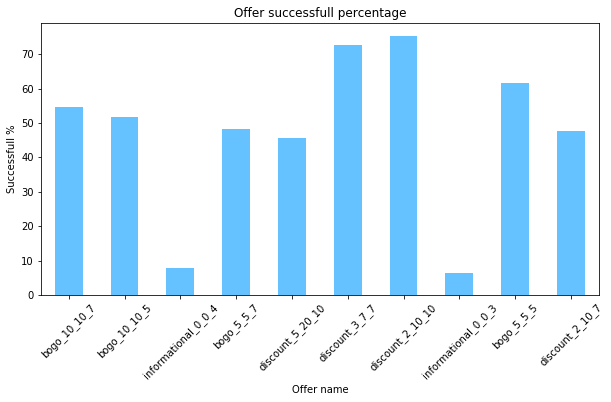

In [145]:
# plotting the offer-successfull percentage
portfolio.plot(kind='bar', 
           x='offer_name',
           y='completed_percent',
           color = '#66c2ff', 
           figsize =(10,5), 
           title = "Offer successfull percentage", 
           legend = False);
plt.xlabel('Offer name');
plt.xticks(rotation=45);
plt.ylabel('Successfull %');

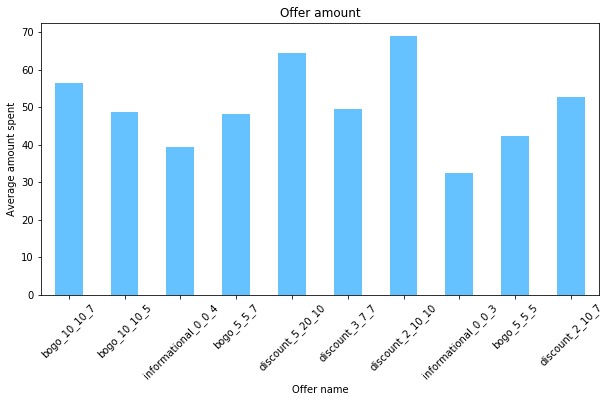

In [146]:
# plotting the average amount spent 
portfolio.plot(kind='bar', 
           x='offer_name',
           y='average amount spent',
           color = '#66c2ff', 
           figsize =(10,5), 
           title = "Offer amount", 
           legend = False);
plt.xlabel('Offer name');
plt.xticks(rotation=45);
plt.ylabel('Average amount spent');

# Analysing offers

## For each offer, i have analysed the dempgraphic group who have  completed the offers after viewing it, hence these are the group of customers, company should be targeting for offers

## For each offer, i have analysed the dempgraphic group who have i completed the offers without viewing it, hence these are the group of customers who would make the required amount of purchase targeted by the company without being influenced by the offer

## For each offers i have provided results in the form of dataframe which are self-explanatory rather than stressing on with each offer results

## Analyze Offer 1) bogo_10_10_7


In [157]:
offer1 = data[data['offer_name'] == 'bogo_10_10_7'] 
offer1 = offer1[offer1['gender'] != 'O']
offer1.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
2,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,17.0,48.28,1,0,10,10,7,bogo,...,1,1,1,bogo_10_10_7,F,75,2017,100000.0,71-80,91-100k
20,ae264e3637204a6fb9bb56bc8210ddfd,aa4862eba776480b8bb9c68455b8c2e1,17.0,60.66,1,0,10,10,7,bogo,...,1,1,1,bogo_10_10_7,F,61,2017,57000.0,61-70,51-60k
28,ae264e3637204a6fb9bb56bc8210ddfd,4b0da7e80e5945209a1fdddfe813dbe0,0.0,0.00,0,0,10,10,7,bogo,...,1,1,1,bogo_10_10_7,M,64,2017,100000.0,61-70,91-100k
32,ae264e3637204a6fb9bb56bc8210ddfd,4b0da7e80e5945209a1fdddfe813dbe0,21.0,31.05,1,0,10,10,7,bogo,...,1,1,1,bogo_10_10_7,M,64,2017,100000.0,61-70,91-100k
59,ae264e3637204a6fb9bb56bc8210ddfd,1e9420836d554513ab90eba98552d0a9,0.0,0.00,0,0,10,10,7,bogo,...,1,1,1,bogo_10_10_7,M,22,2017,70000.0,21-30,61-70k


In [158]:
k=offer1.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
8,F,>90,67.741935
6,F,81-90,67.619048
4,F,61-70,66.501650
3,F,51-60,65.743440
2,F,41-50,65.239295
1,F,31-40,64.016736
17,M,>90,62.857143
5,F,71-80,60.714286
0,F,21-30,59.302326
15,M,81-90,57.364341


### Most completed offer1 percentage by gender and age

In [252]:
k=offer1.groupby(['gender','income-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,income-range,offer_successful
5,F,81-90k,72.598870
6,F,91-100k,72.508591
3,F,61-70k,68.103448
14,M,91-100k,68.093385
2,F,51-60k,67.488789
4,F,71-80k,65.756303
15,M,>100k,65.605096
13,M,81-90k,65.156794
7,F,>100k,64.948454
12,M,71-80k,57.317073


### Most completed offer1 percentage by gender and income-range

In [160]:
k=offer1.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
3,F,51-60,6.413994
4,F,61-70,6.270627
6,F,81-90,5.238095
8,F,>90,4.838710
12,M,51-60,4.793757
5,F,71-80,4.761905
13,M,61-70,4.390935
2,F,41-50,4.030227
14,M,71-80,3.977273
15,M,81-90,3.100775


### Most completed offer1 without viewing the offer percentage by gender and age

In [163]:
k=offer1.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,income-range,offer_successful_without_viewing
15,M,>100k,14.012739
13,M,91-100k,9.727626
3,F,71-80k,9.243697
5,F,91-100k,8.591065
7,F,>100k,8.247423
12,M,81-90k,8.013937
4,F,81-90k,7.627119
11,M,71-80k,3.861789
2,F,61-70k,2.011494
9,M,51-60k,1.517241


### Most completed offer1 without viewing the offer percentage by gender and income

## Analyze Offer 2) bogo_10_10_5

In [164]:
offer2 = data[data['offer_name'] == 'bogo_10_10_5'] 
offer2 = offer2[offer2['gender'] != 'O']
offer2.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
18,4d5c57ea9a6940dd891ad53e9dbe8da0,aa4862eba776480b8bb9c68455b8c2e1,7.0,12.33,1,0,10,10,5,bogo,...,1,1,1,bogo_10_10_5,F,61,2017,57000.0,61-70,51-60k
37,4d5c57ea9a6940dd891ad53e9dbe8da0,c27e0d6ab72c455a8bb66d980963de60,21.0,0.00,0,0,10,10,5,bogo,...,1,1,1,bogo_10_10_5,F,78,2017,71000.0,71-80,71-80k
44,4d5c57ea9a6940dd891ad53e9dbe8da0,f806632c011441378d4646567f357a21,7.0,28.96,1,0,10,10,5,bogo,...,1,1,1,bogo_10_10_5,M,42,2013,69000.0,41-50,61-70k
50,4d5c57ea9a6940dd891ad53e9dbe8da0,d058f73bf8674a26a95227db098147b1,17.0,28.48,1,0,10,10,5,bogo,...,1,1,1,bogo_10_10_5,F,56,2018,88000.0,51-60,81-90k
60,4d5c57ea9a6940dd891ad53e9dbe8da0,1e9420836d554513ab90eba98552d0a9,7.0,35.93,1,0,10,10,5,bogo,...,1,1,1,bogo_10_10_5,M,22,2017,70000.0,21-30,61-70k


In [165]:
k=offer2.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
3,F,51-60,68.128655
6,F,81-90,64.893617
1,F,31-40,64.622642
2,F,41-50,63.814181
8,F,>90,63.768116
4,F,61-70,63.604853
5,F,71-80,61.432507
0,F,21-30,52.631579
14,M,71-80,52.197802
12,M,51-60,50.522648


### Most completed offer2 percentage by gender and age

In [168]:
k=offer2.groupby(['gender','income-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,income-range,offer_successful
15,M,>100k,77.419355
4,F,81-90k,72.560976
5,F,91-100k,71.379310
7,F,>100k,70.096463
3,F,71-80k,69.477912
12,M,81-90k,66.375546
13,M,91-100k,65.948276
1,F,51-60k,63.037975
2,F,61-70k,62.182741
11,M,71-80k,55.491329


### Most completed offer2 percentage by gender and income

In [169]:
k=offer2.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
8,F,>90,2.898551
14,M,71-80,1.923077
5,F,71-80,1.652893
4,F,61-70,1.559792
15,M,81-90,1.515152
2,F,41-50,1.466993
1,F,31-40,1.415094
3,F,51-60,1.315789
12,M,51-60,1.161440
13,M,61-70,1.112656


### Most completed offer2 without viewing the offer percentage by gender and age

In [170]:
k=offer2.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,income-range,offer_successful_without_viewing
7,F,>100k,3.215434
15,M,>100k,2.580645
12,M,81-90k,2.183406
3,F,71-80k,1.807229
11,M,71-80k,1.734104
6,F,<40k,1.492537
2,F,61-70k,1.269036
1,F,51-60k,1.265823
4,F,81-90k,1.219512
13,M,91-100k,0.862069


### Most completed offer2 without viewing the offer percentage by gender and income

## Analyze Offer 3) bogo_5_5_7

In [174]:
offer3 = data[data['offer_name'] == 'bogo_5_5_7'] 
offer3 = offer3[offer3['gender'] != 'O']
offer3.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,0.0,37.67,1,0,5,5,7,bogo,...,1,1,0,bogo_5_5_7,F,75,2017,100000.0,71-80,91-100k
6,9b98b8c7a33c4b65b9aebfe6a799e6d9,e2127556f4f64592b11af22de27a7932,17.0,18.42,1,0,5,5,7,bogo,...,1,1,0,bogo_5_5_7,M,68,2018,70000.0,61-70,61-70k
9,9b98b8c7a33c4b65b9aebfe6a799e6d9,389bc3fa690240e798340f5a15918d5c,7.0,0.00,0,0,5,5,7,bogo,...,1,1,0,bogo_5_5_7,M,65,2018,53000.0,61-70,51-60k
11,9b98b8c7a33c4b65b9aebfe6a799e6d9,389bc3fa690240e798340f5a15918d5c,17.0,15.63,1,0,5,5,7,bogo,...,1,1,0,bogo_5_5_7,M,65,2018,53000.0,61-70,51-60k
51,9b98b8c7a33c4b65b9aebfe6a799e6d9,d058f73bf8674a26a95227db098147b1,21.0,0.00,0,0,5,5,7,bogo,...,1,1,0,bogo_5_5_7,F,56,2018,88000.0,51-60,81-90k


In [175]:
k=offer3.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
2,F,41-50,60.994764
6,F,81-90,58.201058
5,F,71-80,56.983240
3,F,51-60,54.811715
8,F,>90,54.237288
4,F,61-70,52.542373
1,F,31-40,51.190476
12,M,51-60,48.348018
11,M,41-50,47.344461
14,M,71-80,46.898263


### Most completed offer3 percentage by gender and age

In [176]:
k=offer3.groupby(['gender','income-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,income-range,offer_successful
13,M,91-100k,61.250000
12,M,81-90k,61.111111
4,F,81-90k,61.046512
2,F,61-70k,58.885942
1,F,51-60k,58.373206
3,F,71-80k,58.212058
5,F,91-100k,56.474820
11,M,71-80k,50.408163
10,M,61-70k,49.763033
6,F,<40k,46.598639


### Most completed offer3 percentage by gender and income

In [177]:
k=offer3.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
0,F,21-30,25.925926
1,F,31-40,20.238095
3,F,51-60,20.223152
4,F,61-70,18.135593
5,F,71-80,16.480447
6,F,81-90,16.402116
16,M,<20,15.652174
13,M,61-70,15.384615
14,M,71-80,14.143921
9,M,21-30,13.959391


### Most completed offer3 without viewing the offer percentage by gender and age

In [178]:
k=offer3.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,income-range,offer_successful_without_viewing
15,M,>100k,30.496454
7,F,>100k,28.526646
0,F,41-50k,20.312500
6,F,<40k,19.727891
4,F,81-90k,17.732558
5,F,91-100k,17.625899
3,F,71-80k,16.424116
8,M,41-50k,16.077739
1,F,51-60k,14.114833
11,M,71-80k,14.081633


### Most completed offer3 without viewing the offer percentage by gender and income

## Analyze Offer 4) bogo_5_5_5

In [180]:
offer4 = data[data['offer_name'] == 'bogo_5_5_5'] 
offer4 = offer4[offer4['gender'] != 'O']
offer4.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
3,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,21.0,48.28,1,0,5,5,5,bogo,...,1,1,1,bogo_5_5_5,F,75,2017,100000.0,71-80,91-100k
8,f19421c1d4aa40978ebb69ca19b0e20d,389bc3fa690240e798340f5a15918d5c,0.0,9.54,1,0,5,5,5,bogo,...,1,1,1,bogo_5_5_5,M,65,2018,53000.0,61-70,51-60k
12,f19421c1d4aa40978ebb69ca19b0e20d,389bc3fa690240e798340f5a15918d5c,21.0,11.26,1,0,5,5,5,bogo,...,1,1,1,bogo_5_5_5,M,65,2018,53000.0,61-70,51-60k
21,f19421c1d4aa40978ebb69ca19b0e20d,aa4862eba776480b8bb9c68455b8c2e1,24.0,12.56,1,0,5,5,5,bogo,...,1,1,1,bogo_5_5_5,F,61,2017,57000.0,61-70,51-60k
68,f19421c1d4aa40978ebb69ca19b0e20d,868317b9be554cb18e50bc68484749a2,21.0,22.05,1,0,5,5,5,bogo,...,1,1,1,bogo_5_5_5,F,96,2017,89000.0,>90,81-90k


In [181]:
k=offer4.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
6,F,81-90,79.411765
7,F,<20,75.000000
4,F,61-70,70.409982
8,F,>90,70.175439
3,F,51-60,69.220246
0,F,21-30,67.500000
1,F,31-40,66.350711
2,F,41-50,65.577889
5,F,71-80,64.145658
15,M,81-90,63.815789


### Most completed offer4 percentage by gender and age

In [182]:
k=offer4.groupby(['gender','income-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,income-range,offer_successful
15,M,>100k,76.865672
5,F,91-100k,76.490066
7,F,>100k,75.000000
4,F,81-90k,71.014493
1,F,51-60k,70.305677
2,F,61-70k,69.354839
13,M,91-100k,68.609865
12,M,81-90k,66.292135
11,M,71-80k,66.015625
3,F,71-80k,64.858491


### Most completed offer1 without viewing the offer percentage by gender and income

In [184]:
k=offer4.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
17,M,>90,5.084746
5,F,71-80,2.240896
0,F,21-30,2.000000
13,M,61-70,1.941748
4,F,61-70,1.782531
16,M,<20,1.538462
1,F,31-40,1.421801
11,M,41-50,1.399689
9,M,21-30,1.225490
3,F,51-60,1.094391


### Most completed offer4 without viewing the offer percentage by gender and age

In [269]:
k=offer4.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
17,M,>90,5.084746
6,F,71-80,2.240896
1,F,21-30,2.000000
14,M,61-70,1.941748
5,F,61-70,1.782531
9,M,<20,1.538462
2,F,31-40,1.421801
12,M,41-50,1.399689
10,M,21-30,1.225490
4,F,51-60,1.094391


### Most completed offer4 without viewing the offer percentage by gender and income

##  Analyze Offer 5) discount_5_20_10

In [270]:
offer5 = data[data['offer_name'] == 'discount_5_20_10'] 
offer5 = offer5[offer5['gender'] != 'O']
offer5.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
17,0b1e1539f2cc45b7b9fa7c272da2e1d7,aa4862eba776480b8bb9c68455b8c2e1,0.0,12.33,1,0,5,20,10,discount,...,1,0,0,discount_5_20_10,F,61,2017,57000.0,61-70,51-60k
22,0b1e1539f2cc45b7b9fa7c272da2e1d7,31dda685af34476cad5bc968bdb01c53,0.0,0.00,0,0,5,20,10,discount,...,1,0,0,discount_5_20_10,F,62,2016,71000.0,61-70,71-80k
29,0b1e1539f2cc45b7b9fa7c272da2e1d7,4b0da7e80e5945209a1fdddfe813dbe0,7.0,109.28,1,0,5,20,10,discount,...,1,0,0,discount_5_20_10,M,64,2017,100000.0,61-70,91-100k
30,0b1e1539f2cc45b7b9fa7c272da2e1d7,4b0da7e80e5945209a1fdddfe813dbe0,14.0,61.05,1,0,5,20,10,discount,...,1,0,0,discount_5_20_10,M,64,2017,100000.0,61-70,91-100k
39,0b1e1539f2cc45b7b9fa7c272da2e1d7,d53717f5400c4e84affdaeda9dd926b3,0.0,391.30,1,0,5,20,10,discount,...,1,0,0,discount_5_20_10,F,88,2017,53000.0,81-90,51-60k


In [271]:
k=offer4.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
7,F,81-90,79.411765
0,F,<20,75.000000
5,F,61-70,70.409982
8,F,>90,70.175439
4,F,51-60,69.220246
1,F,21-30,67.500000
2,F,31-40,66.350711
3,F,41-50,65.577889
6,F,71-80,64.145658
16,M,81-90,63.815789


In [272]:
k=offer4.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
7,F,81-90,79.411765
0,F,<20,75.000000
5,F,61-70,70.409982
8,F,>90,70.175439
4,F,51-60,69.220246
1,F,21-30,67.500000
2,F,31-40,66.350711
3,F,41-50,65.577889
6,F,71-80,64.145658
16,M,81-90,63.815789


In [273]:
k=offer5.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
17,M,>90,21.052632
8,F,>90,20.689655
7,F,81-90,18.888889
6,F,71-80,17.771883
4,F,51-60,15.915119
5,F,61-70,14.558059
1,F,21-30,14.525140
3,F,41-50,11.704835
15,M,71-80,11.227154
14,M,61-70,9.572901


In [274]:
k=offer5.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,income-range,offer_successful_without_viewing
15,M,>100k,28.571429
7,F,>100k,27.645051
6,F,91-100k,20.577617
5,F,81-90k,16.442049
4,F,71-80k,15.230461
0,F,<40k,12.374582
14,M,91-100k,11.946903
1,F,41-50k,10.756972
13,M,81-90k,9.885932
3,F,61-70k,8.988764


## Analyze  Offer 6) discount_3_7_7

In [275]:
offer6 = data[data['offer_name'] == 'discount_3_7_7'] 
offer6 = offer6[offer6['gender'] != 'O']
offer6.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
15,2298d6c36e964ae4a3e7e9706d1fb8c2,2eeac8d8feae4a8cad5a6af0499a211d,7.0,2.32,0,0,3,7,7,discount,...,1,1,1,discount_3_7_7,M,58,2017,51000.0,51-60,51-60k
24,2298d6c36e964ae4a3e7e9706d1fb8c2,31dda685af34476cad5bc968bdb01c53,14.0,50.76,1,0,3,7,7,discount,...,1,1,1,discount_3_7_7,F,62,2016,71000.0,61-70,71-80k
25,2298d6c36e964ae4a3e7e9706d1fb8c2,31dda685af34476cad5bc968bdb01c53,17.0,90.75,1,0,3,7,7,discount,...,1,1,1,discount_3_7_7,F,62,2016,71000.0,61-70,71-80k
26,2298d6c36e964ae4a3e7e9706d1fb8c2,31dda685af34476cad5bc968bdb01c53,21.0,52.56,1,0,3,7,7,discount,...,1,1,1,discount_3_7_7,F,62,2016,71000.0,61-70,71-80k
62,2298d6c36e964ae4a3e7e9706d1fb8c2,1e9420836d554513ab90eba98552d0a9,17.0,32.06,1,0,3,7,7,discount,...,1,1,1,discount_3_7_7,M,22,2017,70000.0,21-30,61-70k


In [276]:
k=offer6.groupby(['gender','income-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,income-range,offer_successful
5,F,81-90k,84.750733
4,F,71-80k,82.352941
15,M,>100k,82.222222
6,F,91-100k,81.118881
7,F,>100k,81.034483
2,F,51-60k,79.214781
0,F,<40k,78.260870
3,F,61-70k,77.493606
13,M,81-90k,76.862745
14,M,91-100k,76.494024


In [277]:
k=offer6.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
2,F,31-40,83.884298
4,F,51-60,82.448378
7,F,81-90,81.151832
6,F,71-80,80.804954
5,F,61-70,79.362416
1,F,21-30,79.234973
3,F,41-50,76.849642
16,M,81-90,74.712644
8,F,>90,73.076923
12,M,41-50,71.241830


In [278]:
k=offer6.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,income-range,offer_successful_without_viewing
1,F,41-50k,2.666667
0,F,<40k,1.811594
13,M,81-90k,1.568627
7,F,>100k,1.379310
5,F,81-90k,1.173021
6,F,91-100k,1.048951
3,F,61-70k,1.023018
9,M,41-50k,1.018676
11,M,61-70k,0.934579
8,M,<40k,0.891530


In [279]:
k=offer6.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
0,F,<20,2.941176
8,F,>90,1.923077
3,F,41-50,1.670644
5,F,61-70,1.342282
2,F,31-40,1.239669
16,M,81-90,1.149425
10,M,21-30,1.111111
1,F,21-30,1.092896
7,F,81-90,1.047120
15,M,71-80,1.044386


## Analyse offer 7) discount_2_10_10

In [280]:
offer7 = data[data['offer_name'] == 'discount_2_10_10'] 
offer7 = offer7[offer7['gender'] != 'O']
offer7.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
7,fafdcd668e3743c1bb461111dcafc2a4,e2127556f4f64592b11af22de27a7932,21.0,18.42,1,0,2,10,10,discount,...,1,1,1,discount_2_10_10,M,68,2018,70000.0,61-70,61-70k
13,fafdcd668e3743c1bb461111dcafc2a4,389bc3fa690240e798340f5a15918d5c,24.0,11.26,1,0,2,10,10,discount,...,1,1,1,discount_2_10_10,M,65,2018,53000.0,61-70,51-60k
16,fafdcd668e3743c1bb461111dcafc2a4,2eeac8d8feae4a8cad5a6af0499a211d,14.0,13.30,1,0,2,10,10,discount,...,1,1,1,discount_2_10_10,M,58,2017,51000.0,51-60,51-60k
23,fafdcd668e3743c1bb461111dcafc2a4,31dda685af34476cad5bc968bdb01c53,7.0,69.50,1,0,2,10,10,discount,...,1,1,1,discount_2_10_10,F,62,2016,71000.0,61-70,71-80k
27,fafdcd668e3743c1bb461111dcafc2a4,31dda685af34476cad5bc968bdb01c53,24.0,0.00,0,0,2,10,10,discount,...,1,1,1,discount_2_10_10,F,62,2016,71000.0,61-70,71-80k


In [281]:
k=offer7.groupby(['gender','income-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,income-range,offer_successful
7,F,>100k,90.251572
15,M,>100k,87.586207
5,F,81-90k,85.757576
13,M,81-90k,84.587814
4,F,71-80k,84.570312
2,F,51-60k,82.038835
6,F,91-100k,81.327801
12,M,71-80k,80.000000
14,M,91-100k,79.098361
1,F,41-50k,78.354978


In [282]:
k=offer7.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
7,F,81-90,87.134503
8,F,>90,85.937500
5,F,61-70,84.984026
2,F,31-40,83.482143
4,F,51-60,81.388889
3,F,41-50,79.945055
1,F,21-30,78.089888
6,F,71-80,77.439024
13,M,51-60,75.796930
15,M,71-80,74.550129


In [283]:
k=offer7.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,income-range,offer_successful_without_viewing
7,F,>100k,1.572327
6,F,91-100k,1.244813
9,M,41-50k,1.174497
4,F,71-80k,0.976562
5,F,81-90k,0.909091
8,M,<40k,0.727802
15,M,>100k,0.689655
12,M,71-80k,0.631579
14,M,91-100k,0.409836
13,M,81-90k,0.358423


In [284]:
k=offer7.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
17,M,>90,2.941176
7,F,81-90,2.339181
8,F,>90,1.562500
9,M,<20,0.980392
4,F,51-60,0.833333
11,M,31-40,0.801603
15,M,71-80,0.771208
12,M,41-50,0.756430
6,F,71-80,0.609756
3,F,41-50,0.549451


## Analyse Offer 8) discount_2_10_7

In [285]:
offer8 = data[data['offer_name'] == 'discount_2_10_7'] 
offer8 = offer8[offer8['gender'] != 'O']
offer8.head()

,offer_id,customer_id,time,amount,offer_successful,offer_successful_without_viewing,reward,difficulty,duration,offer_type,...,email,mobile,social,offer_name,gender,age,became_member_on,income,age-range,income-range
4,2906b810c7d4411798c6938adc9daaa5,e2127556f4f64592b11af22de27a7932,0.0,0.00,0,0,2,10,7,discount,...,1,1,0,discount_2_10_7,M,68,2018,70000.0,61-70,61-70k
10,2906b810c7d4411798c6938adc9daaa5,389bc3fa690240e798340f5a15918d5c,14.0,15.63,1,0,2,10,7,discount,...,1,1,0,discount_2_10_7,M,65,2018,53000.0,61-70,51-60k
40,2906b810c7d4411798c6938adc9daaa5,d53717f5400c4e84affdaeda9dd926b3,14.0,7.76,0,0,2,10,7,discount,...,1,1,0,discount_2_10_7,F,88,2017,53000.0,81-90,51-60k
48,2906b810c7d4411798c6938adc9daaa5,d058f73bf8674a26a95227db098147b1,7.0,27.23,1,0,2,10,7,discount,...,1,1,0,discount_2_10_7,F,56,2018,88000.0,51-60,81-90k
56,2906b810c7d4411798c6938adc9daaa5,ebe7ef46ea6f4963a7dd49f501b26779,17.0,26.62,1,0,2,10,7,discount,...,1,1,0,discount_2_10_7,M,59,2015,41000.0,51-60,41-50k


In [286]:
k=offer8.groupby(['gender','age-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,age-range,offer_successful
3,F,41-50,59.564165
8,F,>90,57.812500
5,F,61-70,57.365685
4,F,51-60,53.571429
2,F,31-40,50.420168
15,M,71-80,49.857550
14,M,61-70,48.671329
13,M,51-60,48.488242
7,F,81-90,47.567568
6,F,71-80,47.368421


In [287]:
k=offer8.groupby(['gender','income-range'])['offer_successful'].mean().reset_index().sort_values(by='offer_successful', ascending=False).head(10)
k['offer_successful'] = k['offer_successful'] * 100
k

,gender,income-range,offer_successful
13,M,81-90k,65.328467
5,F,81-90k,64.444444
14,M,91-100k,63.063063
6,F,91-100k,60.507246
3,F,61-70k,60.372340
2,F,51-60k,55.187638
4,F,71-80k,53.078556
12,M,71-80k,52.830189
15,M,>100k,51.034483
11,M,61-70k,46.515152


In [288]:
k=offer8.groupby(['gender','age-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,age-range,offer_successful_without_viewing
7,F,81-90,20.540541
0,F,<20,18.918919
6,F,71-80,18.421053
1,F,21-30,17.441860
4,F,51-60,17.285714
8,F,>90,14.062500
2,F,31-40,13.445378
14,M,61-70,13.286713
5,F,61-70,13.171577
16,M,81-90,12.949640


In [289]:
k=offer8.groupby(['gender','income-range'])['offer_successful_without_viewing'].mean().reset_index().sort_values(by='offer_successful_without_viewing', ascending=False).head(10)
k['offer_successful_without_viewing'] = k['offer_successful_without_viewing'] * 100
k

,gender,income-range,offer_successful_without_viewing
15,M,>100k,25.517241
7,F,>100k,22.522523
1,F,41-50k,18.340611
4,F,71-80k,16.985138
0,F,<40k,14.909091
5,F,81-90k,14.603175
6,F,91-100k,14.130435
2,F,51-60k,12.803532
12,M,71-80k,12.075472
14,M,91-100k,11.261261


## Analysing Best Offers for each Age-Range

In [188]:
offer_name_list = []
offers_success_list = []
age_list = []
# get the list of age-range
age_range_list = data['age-range'].unique()
# for each age-range get the offer with most successfull completion range and it to the list
for i in age_range_list:
    age = data[data['age-range'] == i]
    p = age.groupby('offer_name')['offer_successful'].mean().reset_index().sort_values(ascending = False, by='offer_successful')
    p['offer_successful'] = p['offer_successful'] * 100
    offer_name_list.append(p.iloc[0].to_list()[0])
    offers_success_list.append(p.iloc[0].to_list()[1])
    age_list.append(i)
# create a dataframe for best offers
d = { 'age-range': age_list, 'offer_name': offer_name_list, 'offer_success_percent': offers_success_list}
best_offers_df = pd.DataFrame(data = d)
best_offers_df

,age-range,offer_name,offer_success_percent
0,71-80,discount_2_10_10,75.753425
1,61-70,discount_2_10_10,77.296106
2,51-60,discount_2_10_10,78.279975
3,81-90,discount_2_10_10,80.000000
4,41-50,discount_3_7_7,73.537872
5,21-30,discount_2_10_10,66.719243
6,>90,discount_2_10_10,80.612245
7,31-40,discount_2_10_10,74.557823
8,<20,discount_3_7_7,66.025641


## Analysing Best Offers for each Income-Range

In [189]:
offer_name_list = []
offers_success_list = []
income_list = []
# get the list of income-range
income_range_list = data['income-range'].unique()
# for each income-range get the offer with most successfull completion range and it to the list
for i in income_range_list:
    income = data[data['income-range'] == i]
    p = income.groupby('offer_name')['offer_successful'].mean().reset_index().sort_values(ascending = False, by='offer_successful')
    p['offer_successful'] = p['offer_successful'] * 100
    offer_name_list.append(p.iloc[0].to_list()[0])
    offers_success_list.append(p.iloc[0].to_list()[1])
    income_list.append(i)
# create a dataframe for best offers
d = { 'income-range': income_list, 'offer_name': offer_name_list, 'offer_success_percent': offers_success_list}
best_offers_df = pd.DataFrame(data = d)
best_offers_df

,income-range,offer_name,offer_success_percent
0,91-100k,discount_2_10_10,80.081301
1,61-70k,discount_2_10_10,73.809524
2,51-60k,discount_2_10_10,71.885522
3,71-80k,discount_2_10_10,82.517483
4,81-90k,discount_2_10_10,85.113269
5,41-50k,discount_2_10_10,69.019139
6,<40k,discount_3_7_7,65.392562
7,>100k,discount_2_10_10,89.416847


## Analysing the best offers for the customers date-joined

In [190]:
offer_name_list = []
offers_success_list = []
year_list = []
# get the list of became_member_on
year_range_list = data['became_member_on'].unique()
# for each became_member_on get the offer with most successfull completion range and it to the list
for i in year_range_list:
    year = data[data['became_member_on'] == i]
    p = year.groupby('offer_name')['offer_successful'].mean().reset_index().sort_values(ascending = False, by='offer_successful')
    p['offer_successful'] = p['offer_successful'] * 100
    offer_name_list.append(p.iloc[0].to_list()[0])
    offers_success_list.append(p.iloc[0].to_list()[1])
    year_list.append(i)
# create a dataframe for best offers
d = { 'year': year_list, 'offer_name': offer_name_list, 'offer_success_percent': offers_success_list}
best_offers_df = pd.DataFrame(data = d)
best_offers_df

,year,offer_name,offer_success_percent
0,2017,discount_2_10_10,72.910663
1,2018,discount_2_10_10,49.707260
2,2016,discount_2_10_10,96.441809
3,2013,discount_2_10_10,93.333333
4,2015,discount_2_10_10,95.718232
5,2014,discount_2_10_10,87.577640


## Analysing Offer success percentage for each age-range

In [191]:
age_list = []
offers_success_list = []
# get the list of age-range
age_range_list = data['age-range'].unique()
# for each age-range calculate the offer successfull percentage and append it to the list
for i in age_range_list:
    age = data[data['age-range'] == i]
    offers_success_list.append(age['offer_successful'].mean() * 100)
    age_list.append(i)
d = { 'age-range': age_list,'offer_success_percent': offers_success_list}
best_offers_df = pd.DataFrame(data = d)
best_offers_df

,age-range,offer_success_percent
0,71-80,49.086197
1,61-70,49.065993
2,51-60,49.514743
3,81-90,50.541728
4,41-50,47.873141
5,21-30,37.961165
6,>90,49.349349
7,31-40,44.029436
8,<20,34.748011


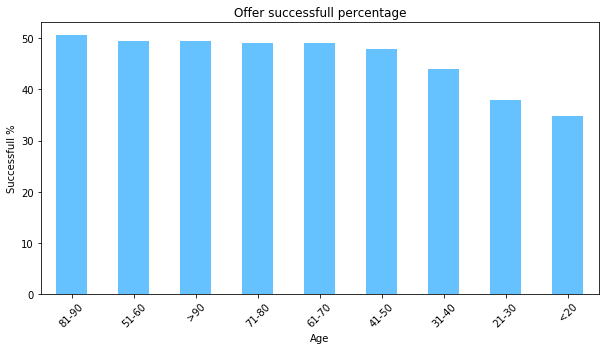

In [192]:
# plotting offer sucessfull percentage for each age-range
best_offers_df.reset_index().sort_values(by='offer_success_percent', ascending = False).plot(kind='bar', 
           x='age-range',
           y='offer_success_percent',
           color = '#66c2ff', 
           figsize =(10,5), 
           title = "Offer successfull percentage", 
           legend = False);
plt.xlabel('Age');
plt.xticks(rotation=45);
plt.ylabel('Successfull %');

## Analysing Offer Successful percentage for each Income-range 

In [193]:
income_list = []
offers_success_list = []
# get thelist of income-range
income_range_list = data['income-range'].unique()
# for each income-range calculate the offer successfull percentage and append it to the list
for i in income_range_list:
    income = data[data['income-range'] == i]
    offers_success_list.append(income['offer_successful'].mean() * 100)
    income_list.append(i)
d = { 'income-range': income_list,'offer_success_percent': offers_success_list}
best_offers_df = pd.DataFrame(data = d)
best_offers_df

,income-range,offer_success_percent
0,91-100k,56.410741
1,61-70k,48.316000
2,51-60k,46.495755
3,71-80k,52.556875
4,81-90k,58.272328
5,41-50k,36.925628
6,<40k,34.860867
7,>100k,53.932833


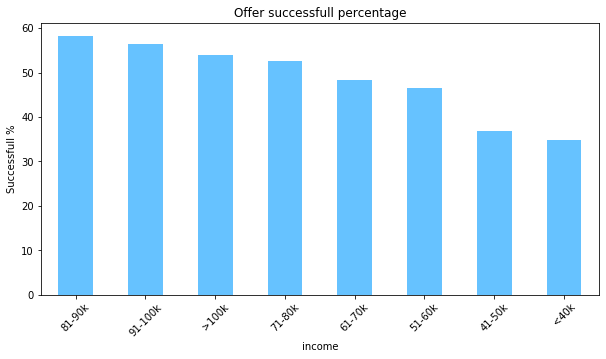

In [194]:
# plotting offer sucessfull percentage for each income-range
best_offers_df.reset_index().sort_values(by='offer_success_percent', ascending = False).plot(kind='bar', 
           x='income-range',
           y='offer_success_percent',
           color = '#66c2ff', 
           figsize =(10,5), 
           title = "Offer successfull percentage", 
           legend = False);
plt.xlabel('income');
plt.xticks(rotation=45);
plt.ylabel('Successfull %');

## Analysing Offers successful percentage according to the membership start year

In [195]:
year_list = []
offers_success_list = []
# get the list of became_member_on
year_range_list = data['became_member_on'].unique()
# for each year-range calculate the offer successfull percentage and append it to the list
for i in year_range_list:
    year = data[data['became_member_on'] == i]
    offers_success_list.append(year['offer_successful'].mean() * 100)
    year_list.append(i)
d = { 'year': year_list,'offer_success_percent': offers_success_list}
best_offers_df = pd.DataFrame(data = d)
best_offers_df

,year,offer_success_percent
0,2017,46.232836
1,2018,31.180711
2,2016,62.744083
3,2013,47.063622
4,2015,57.930070
5,2014,47.090481


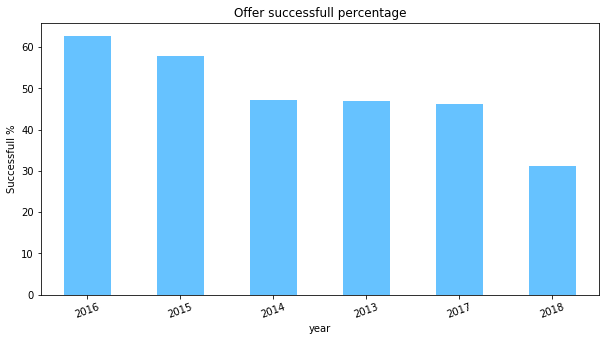

In [196]:
# plotting offer sucessfull percentage for each year-joined customer
best_offers_df.reset_index().sort_values(by='offer_success_percent', ascending = False).plot(kind='bar', 
           x='year',
           y='offer_success_percent',
           color = '#66c2ff', 
           figsize =(10,5), 
           title = "Offer successfull percentage", 
           legend = False);
plt.xlabel('year');
plt.xticks(rotation=20);
plt.ylabel('Successfull %');

## Ananlysing offer successful percentage for each gender

In [197]:
gender_list = []
offers_success_list = []
# get the list of genders
gender_range_list = data['gender'].unique()
# for each gender calculate the offer successfull percentage and append it to the list
for i in gender_range_list:
    gender = data[data['gender'] == i]
    offers_success_list.append(gender['offer_successful'].mean() * 100)
    gender_list.append(i)
d = { 'gender': gender_list,'offer_success_percent': offers_success_list}
best_offers_df = pd.DataFrame(data = d)
best_offers_df

,gender,offer_success_percent
0,F,53.114073
1,M,42.678801
2,O,55.567686


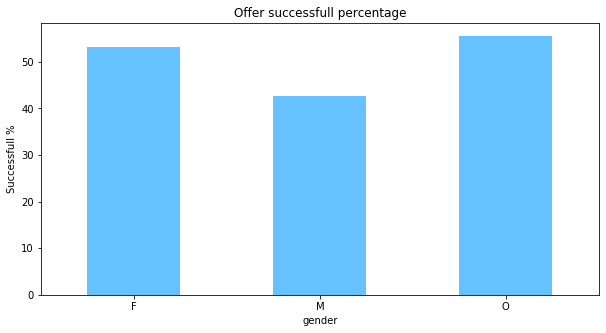

In [198]:
# plotting offer sucessfull percentage for each gender
best_offers_df.plot(kind='bar', 
           x='gender',
           y='offer_success_percent',
           color = '#66c2ff', 
           figsize =(10,5), 
           title = "Offer successfull percentage", 
           legend = False);
plt.xlabel('gender');
plt.xticks(rotation=0);
plt.ylabel('Successfull %');

# Predictive Modelling

## Machine Learning  model to predict whether the offer is successfull 

### Data Pre-processing for model

In [40]:
data.columns

Index(['offer_id', 'customer_id', 'time', 'amount', 'offer_successful',
       'offer_successful_without_viewing', 'reward', 'difficulty', 'duration',
       'offer_type', 'web', 'email', 'mobile', 'social', 'offer_name',
       'gender', 'age', 'became_member_on', 'income', 'age-range',
       'income-range'],
      dtype='object')

In [41]:
X = data[['amount', 'reward', 'difficulty', 'duration', 'offer_type', 'web', 'email', 'mobile', 'social', 'gender', 
          'age', 'became_member_on', 'income']]
Y = data['offer_successful']
X.head()

,amount,reward,difficulty,duration,offer_type,web,email,mobile,social,gender,age,became_member_on,income
0,37.67,5,5,7,bogo,1,1,1,0,F,75,2017,100000.0
1,49.39,0,0,3,informational,0,1,1,1,F,75,2017,100000.0
2,48.28,10,10,7,bogo,0,1,1,1,F,75,2017,100000.0
3,48.28,5,5,5,bogo,1,1,1,1,F,75,2017,100000.0
4,0.00,2,10,7,discount,1,1,1,0,M,68,2018,70000.0


In [42]:
X.dtypes

amount              float64
reward                int64
difficulty            int64
duration              int64
offer_type           object
web                   int64
email                 int64
mobile                int64
social                int64
gender               object
age                   int64
became_member_on     object
income              float64
dtype: object

In [200]:
def clean_data(X):
    '''
    Input:(X) - Dataframe with features to train
    Output(X) - Cleaned X dataframe without object datatyape
    Description :- to covert the each object datatype into int or float
    '''
    
    X['bogo'] = X.offer_type.apply(lambda x: 1 if x == 'bogo' else 0)
    X['discount'] = X.offer_type.apply(lambda x: 1 if x == 'discount' else 0)
    X['informational'] = X.offer_type.apply(lambda x: 1 if x == 'informational' else 0)
    X['male'] = X.gender.apply(lambda x: 1 if x == 'M' else 0)
    X['female'] = X.gender.apply(lambda x: 1 if x == 'F' else 0)
    X['other_gender'] = X.gender.apply(lambda x: 1 if x == ')' else 0)
    X['became_member_on'] = X['became_member_on'].astype(int)

    X.drop(columns=['offer_type','gender'], inplace=True)

    return X

In [44]:
X = clean_data(X)
X.head()

,amount,reward,difficulty,duration,web,email,mobile,social,age,became_member_on,income,bogo,discount,informational,male,female,other_gender
0,37.67,5,5,7,1,1,1,0,75,2017,100000.0,1,0,0,0,1,0
1,49.39,0,0,3,0,1,1,1,75,2017,100000.0,0,0,1,0,1,0
2,48.28,10,10,7,0,1,1,1,75,2017,100000.0,1,0,0,0,1,0
3,48.28,5,5,5,1,1,1,1,75,2017,100000.0,1,0,0,0,1,0
4,0.00,2,10,7,1,1,1,0,68,2018,70000.0,0,1,0,1,0,0


In [237]:
# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.4, random_state=42)

## Predicting with KNeighbors Classifier

In [101]:
# Intiating the model the with KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [102]:
y_pred_training = knn.predict(X_train)

In [103]:
accuracy_score(y_pred_training, y_train) * 100

91.26817042606517

In [104]:
f1_score(y_pred_training, y_train)

0.9101922977780069

In [105]:
y_pred_test = knn.predict(X_test)

In [106]:
accuracy_score(y_pred_test, y_test) * 100

87.74482162324725

In [107]:
f1_score(y_pred_test, y_test)

0.8752009800168441

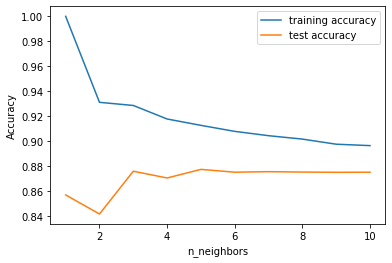

In [108]:
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend() 

In [109]:
d = { 'training_score': accuracy_score(y_pred_training, y_train) * 100 ,
     'testing_score': accuracy_score(y_pred_test, y_test) * 100,
        'best_parameter(n_neighbors)': 5}
KNeighborsClassifier_df =  pd.DataFrame(data = d, index= ['KNeighborsClassifier'])
KNeighborsClassifier_df

,training_score,testing_score,best_parameter(n_neighbors)
KNeighborsClassifier,91.26817,87.744822,5


In [368]:
KNeighborsClassifier_df.to_csv('KNeighborsClassifier_df.csv', index=False)

## Predicting with multiple classifying algorithms to get the best accuracy_score

### Predicting with RandomForest Classifier

In [335]:
# Intiating the model the with RandomForestClassifier
rf = RandomForestClassifier()
# parameters to pass
parameters = {'n_estimators' : [50,250,], 'max_depth':[5,10,15,20]}

# using GridSearchCV to find the best parameters of the model
cv = GridSearchCV(rf ,param_grid=parameters, cv=5)

In [336]:
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [337]:
train_predict = cv.predict(X_train)
rf_train_score = accuracy_score(train_predict, y_train) * 100
rf_train_score

92.30827067669173

In [342]:
test_predict = cv.predict(X_test)
rf_test_score = accuracy_score(test_predict, y_test) * 100
rf_test_score

91.32363444983271

In [339]:
rf_f1_score = f1_score(test_predict, y_test)
rf_f1_score

0.9105495698007907

In [340]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [351]:
cv.best_params_

{'max_depth': 10, 'n_estimators': 250}

In [354]:
d = { 'training_score': rf_train_score,
     'testing_score': rf_test_score,
     'f1_score': rf_f1_score,
     'best_parameters(max_depth)': 10 ,
     'best_parameters(n_estimators)': 250 }
RandomForestClassifier_df =  pd.DataFrame(data = d, index= ['RandomForestClassifier'])
RandomForestClassifier_df

,training_score,testing_score,f1_score,best_parameters(max_depth),best_parameters(n_estimators)
RandomForestClassifier,92.308271,91.323634,0.91055,10,250


In [355]:
RandomForestClassifier_df.to_csv('RandomForestClassifier_df.csv', index=False)

### Predicting with Bagging Classifier

In [356]:
# Intitating the model with BaggingClassifier
bg = BaggingClassifier(RandomForestClassifier(max_depth=10, n_estimators=250),max_samples=0.5, max_features=0.5,
                        n_estimators=100, random_state=42)

In [357]:
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=250,
                                                        n_jobs=None,
         

In [358]:
train_predict = bg.predict(X_train)
bc_train_score = accuracy_score(train_predict, y_train) * 100
bc_train_score

92.1328320802005

In [359]:
test_predict = bg.predict(X_test)
bc_test_score = accuracy_score(test_predict, y_test) * 100
bc_test_score

91.27476410661254

In [360]:
bc_f1_score = f1_score(test_predict, y_test)
bc_f1_score

0.9100561906607246

In [369]:
d = { 'training_score': bc_train_score,
     'testing_score': bc_test_score,
     'f1_score': bc_f1_score,
     'base_estimator': 'RandomForestClassifier' ,
     'best_parameters(max_samples)': 0.5 ,
     'best_parameters(max_features)': 0.5 ,
     'best_parameters(random_state)': 42 ,
     'best_parameters(n_estimators)': 100 }
BaggingClassifier_df =  pd.DataFrame(data = d, index= ['BaggingClassifier'])
BaggingClassifier_df

,training_score,testing_score,f1_score,base_estimator,best_parameters(max_samples),best_parameters(max_features),best_parameters(random_state),best_parameters(n_estimators)
BaggingClassifier,92.132832,91.274764,0.910056,RandomForestClassifier,0.5,0.5,42,100


In [362]:
BaggingClassifier_df.to_csv('BaggingClassifier_df.csv', index=False)

### Predicting with AdaBoost Classifier

In [363]:
# Intiating the model with AdaBoostClassifier
ada = AdaBoostClassifier(RandomForestClassifier(max_depth=10, n_estimators=250),
                        n_estimators=10, random_state=42)

In [364]:
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=250,
                          

In [365]:
y_pred_training = ada.predict(X_train)
ac_train_score = accuracy_score(y_pred_training, y_train) * 100
ac_train_score

95.62406015037594

In [366]:
y_pred_testing = ada.predict(X_test)
ac_test_score = accuracy_score(y_pred_testing, y_test) * 100
ac_test_score

91.30107890680802

In [368]:
ac_f1_score = f1_score(y_pred_testing, y_test)
ac_f1_score

0.9096234963286985

In [370]:
d = { 'training_score': ac_train_score,
     'testing_score': ac_test_score,
     'f1_score': ac_f1_score,
     'base_estimator': 'RandomForestClassifier' ,
     'best_parameters(random_state)': 42 ,
     'best_parameters(n_estimators)': 10 }
AdaBoostClassifier_df =  pd.DataFrame(data = d, index= ['AdaBoostClassifier'])
AdaBoostClassifier_df

,training_score,testing_score,f1_score,base_estimator,best_parameters(random_state),best_parameters(n_estimators)
AdaBoostClassifier,95.62406,91.301079,0.909623,RandomForestClassifier,42,10


In [371]:
AdaBoostClassifier_df.to_csv('AdaBoostClassifier_df.csv', index=False)

## Among all the classifiers, AdaBoostClassifier gives the best accuracy_score for the training set as well as testing set with decent f1 score.
## Hence, AdaBoostClassifier should be used to predict whether the offer will be successfull

## Most Important Features for predicting whether the offer is successfull

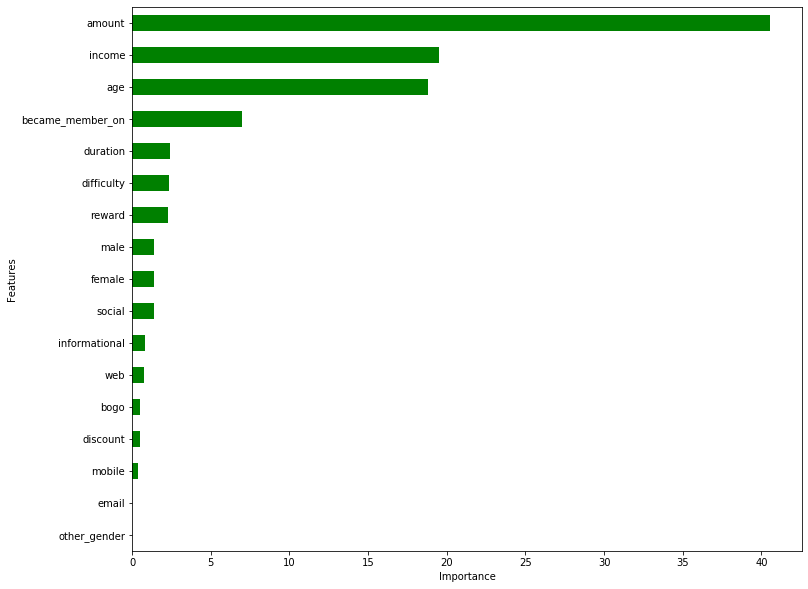

In [377]:
importances_rf = pd.Series(ada.feature_importances_, index = X.columns) 
importances_rf = importances_rf * 100
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='green', figsize=(12,10)); 
plt.xlabel('Importance');
plt.ylabel('Features');
plt.show(); 

# Predicting how much amount will a customer spend in an offer duration period 

### Data preprocessing

In [98]:
X = data[['reward', 'difficulty', 'duration', 'offer_type', 'web', 'email', 'mobile', 'social', 'gender', 
          'age', 'became_member_on', 'income','offer_successful']]
Y = data['amount']
X = clean_data(X)
X.head()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,reward,difficulty,duration,web,email,mobile,social,age,became_member_on,income,offer_successful,bogo,discount,informational,male,female,other_gender
0,5,5,7,1,1,1,0,75,2017,100000.0,1,1,0,0,0,1,0
1,0,0,3,0,1,1,1,75,2017,100000.0,0,0,0,1,0,1,0
2,10,10,7,0,1,1,1,75,2017,100000.0,1,1,0,0,0,1,0
3,5,5,5,1,1,1,1,75,2017,100000.0,1,1,0,0,0,1,0
4,2,10,7,1,1,1,0,68,2018,70000.0,0,0,1,0,1,0,0


In [99]:
# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y ,test_size=0.4, random_state=42)

## Predicting with RandomForest Regressor

In [118]:
# Intitiating the model with RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=0, max_features=5)

In [119]:
rfr.fit(X_train, y_train)
train_pred = rfr.predict(X_train)
rfr_train_mean_error = mean_absolute_error(train_pred, y_train)
rfr_train_mean_error

19.063666876811904

In [120]:
rfr_train_median_error =median_absolute_error(train_pred, y_train)
rfr_train_median_error

10.252786923635163

In [121]:
rfr.fit(X_train, y_train)
pred = rfr.predict(X_test)
rfr_test_mean_error = mean_absolute_error(pred, y_test)
rfr_test_mean_error

20.122378971947928

In [122]:
rfr_test_median_error = median_absolute_error(pred, y_test)
rfr_test_median_error

10.829758617916148

In [134]:
d = { 'training_mean_absolute_error': rfr_train_mean_error,
     'training_median_absolute_error': rfr_train_median_error,
     'testing_mean_absolute_error': rfr_test_mean_error,
     'testing_median_absolute_error': rfr_test_median_error,
     'best_parameters(random_state)': 0 ,
     'best_parameters(n_estimators)': 50,
     'best_parameters(max_depth)': 10 ,
     'best_parameters(max_features)': 10 ,}
RandomForestRegressor_df =  pd.DataFrame(data = d, index= ['RandomForestRegressor_df'])
RandomForestRegressor_df

,training_mean_absolute_error,training_median_absolute_error,testing_mean_absolute_error,testing_median_absolute_error,best_parameters(random_state),best_parameters(n_estimators),best_parameters(max_depth),best_parameters(max_features)
RandomForestRegressor_df,19.063667,10.252787,20.122379,10.829759,0,50,10,10


In [135]:
RandomForestRegressor_df.to_csv('RandomForestRegressor_df.csv', index=False)

# Improvement
## The mean and median absolute error are too high with RandomForestRegressor. Need to predict with different Regressor algorithm.

## Predicting with GradientBoosting Regressor

In [125]:
gb = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=1, subsample=1, max_features=0.8) 

In [130]:
gb.fit(X_train, y_train)
train_pred = gb.predict(X_train)
gb_train_mean_error = mean_absolute_error(train_pred, y_train)
gb_train_mean_error

13.675590835208032

In [131]:
gb_train_median_error = median_absolute_error(train_pred, y_train)
gb_train_median_error

6.903460902143712

In [132]:
gb.fit(X_train, y_train)
pred = gb.predict(X_test)
gb_test_mean_error = mean_absolute_error(pred, y_test)
gb_test_mean_error

21.811741402070243

In [133]:
gb_test_median_error =median_absolute_error(pred, y_test)
gb_test_median_error

10.346020508398968

In [136]:
d = { 'training_mean_absolute_error': gb_train_mean_error,
     'training_median_absolute_error': gb_train_median_error,
     'testing_mean_absolute_error': gb_test_mean_error,
     'testing_median_absolute_error': gb_test_median_error,
     'best_parameters(random_state)': 1 ,
     'best_parameters(n_estimators)': 100,
     'best_parameters(max_depth)': 10 ,
      'best_parameters(subsample)': 1 ,
     'best_parameters(max_features)': 0.8 ,}
GradientBoostingRegressor =  pd.DataFrame(data = d, index= ['GradientBoostingRegressor'])
GradientBoostingRegressor

,training_mean_absolute_error,training_median_absolute_error,testing_mean_absolute_error,testing_median_absolute_error,best_parameters(random_state),best_parameters(n_estimators),best_parameters(max_depth),best_parameters(subsample),best_parameters(max_features)
GradientBoostingRegressor,13.675591,6.903461,21.811741,10.346021,1,100,10,1,0.8


In [137]:
GradientBoostingRegressor.to_csv('GradientBoostingRegressor.csv', index=False)

## The GradientBoostingRegressor yeild better mean/median absolute errors for both training and testing set better than the RandomForestClassifier.
## The amount spent by the customer during the offer duration period should be predicted using GradientBoostingRegressor.

## Feature importance for predicting the amount 

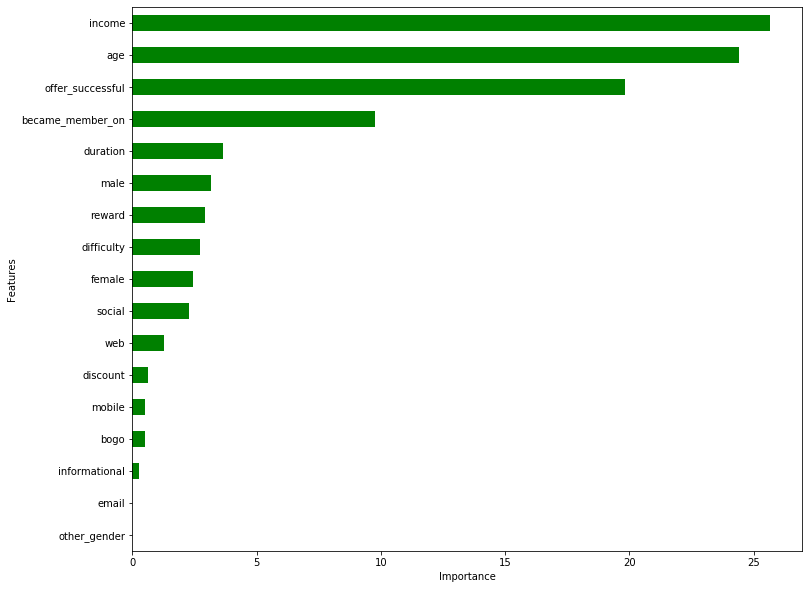

In [295]:
importances_gb = pd.Series(gb.feature_importances_, index = X.columns) 
importances_gb = importances_gb * 100
sorted_importances_gb = importances_gb.sort_values()
sorted_importances_gb.plot(kind='barh', color='green', figsize=(12,10)); 
plt.xlabel('Importance');
plt.ylabel('Features');
plt.show(); 

# Offer Recommendations

## Rank based Offer Recommendations
### For new customers and customers who have not completed any offer yet, Rank based recommendations should be used. 

In [111]:
def rank(n, df = portfolio):
    
    # get the most completed n offers
    top_offers = portfolio.sort_values(by='completed_percent', ascending=False)
    top_offers = top_offers.head(n)
    
    # get the offer name of most completed offers
    top_offer_names = top_offers['offer_name'].tolist()
   
    return top_offer_names 

In [112]:
# get top 5 articles
rank(5)

['discount_2_10_10',
 'discount_3_7_7',
 'bogo_5_5_5',
 'bogo_10_10_7',
 'bogo_10_10_5']

### Top 5 articles recommended to a user

## User-User Based Collaborative Filtering
### For customers who have completed atleast 1 offer, this recommedation technique should be used.

In [113]:
# get the rows where offer is successfull
offer_successful_data = data[data['offer_successful'] == 1]

In [114]:
# create a user-offer matrix with 1s and 0s
user_offer = offer_successful_data.groupby(['customer_id','offer_name']).count()['offer_successful'].unstack()
user_offer.fillna(0,inplace=True)

## Created User-Item matrix

In [115]:
user_offer

offer_name,bogo_10_10_5,bogo_10_10_7,bogo_5_5_5,bogo_5_5_7,discount_2_10_10,discount_2_10_7,discount_3_7_7,discount_5_20_10,informational_0_0_3,informational_0_0_4
customer_id,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
0011e0d4e6b944f998e987f904e8c1e5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
0020c2b971eb4e9188eac86d93036a77,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
0020ccbbb6d84e358d3414a3ff76cffd,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
003d66b6608740288d6cc97a6903f4f0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
fff29fb549084123bd046dbc5ceb4faa,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
fff3ba4757bd42088c044ca26d73817a,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
fff7576017104bcc8677a8d63322b5e1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [116]:
user_offer.shape

(11623, 10)

## Function to get the customers similar to the given customers. 

In [117]:
def get_top_sorted_users(customer_id, df=offer_successful_data, user_offer=user_offer):
    '''
    INPUT:
    customer_id - (int) a customer_id
    user_offer - (pandas dataframe) matrix of users by offers: 
                1's when a user has successfully completed an offer, 0 otherwise
    df(offer_successful_data)- offer_successful_data dataframe where the offers are successfull
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor customer_id
                    similarity - measure of the similarity of each customer to the provided customer_id
                    offer_successful - the number of offer_successfull by a customer
                    
    Other Details - sort the neighbors_df by the similarity and then by number of offer_sucessfull where 
                    highest of each is higher in the dataframe
     
    '''
    
    # get the provided user row from the user_item matrix
    provided_user = np.array(user_offer[customer_id == user_offer.index])

    # get a list of customer ids
    customer_ids = [i for i in  user_offer.index.values]
    
    # compute the similarity of the given user to each user
    similarity_list = np.dot(provided_user, np.array(user_offer).T)[0]
    similarity_series = pd.Series(similarity_list, index=user_offer.index.values.tolist())

    # get the user article interactions
    offer_successful = df.groupby('customer_id')['offer_successful'].count()
    neighbors_df = pd.DataFrame({'neighbor_id':customer_ids, 'similarity':similarity_series, 
                                 'offer_successful':offer_successful}).set_index('neighbor_id')

    # sort the neighbors_df dataframe by similarity and offer_successful
    neighbors_df.sort_values(['similarity', 'offer_successful'], ascending=[False, False], inplace=True)

    # remove current user from dataframe
    neighbors_df.drop([customer_id], inplace=True) 
    
    return neighbors_df # Return the dataframe specified in the doc_string

## Customers are sorted according to the similarity and the most offer_successfull count

In [118]:
# get similar customers to customer_id-'78afa995795e4d85b5d9ceeca43f5fef'
get_top_sorted_users('78afa995795e4d85b5d9ceeca43f5fef').head()    

,similarity,offer_successful
neighbor_id,,
1acb3e87e3304271a3c917cc80a53780,5.0,6
4b72995c52ab4cd5ab407924b09e1ab4,5.0,6
db23badcb0e64c0eb193721a727a446f,5.0,6
306cd06bf8424bc9839ab2d631a902a4,5.0,5
41a140a85d05424489c6d0c264ba68d8,5.0,5


## Function to get the Offer_names where the customer has completed the offer

In [119]:
def get_user_offers(customer_id, user_offer=user_offer):
    '''
    INPUT:
    customer_id - (int) a customer id
    user_offer -  (pandas dataframe) matrix of users by offers: 
                1's when a user has successfully completed an offer, 0 otherwise
    
    OUTPUT:

    offer_names - (list) a list of article names associated with the list of article ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of offer names sucessfully completed by the user
    '''
    
    # get row of user
    user_row = user_offer.loc[customer_id]
    
    # find indices of user_row where offer is successful
    ind = np.where(user_row  >= 1)
    
    # get offer names where the offer is successfull
    offer_names = user_row.index[ind].values.tolist()
    
    return offer_names

In [120]:
# get the offer_names for customer_id-'78afa995795e4d85b5d9ceeca43f5fef'
try:
    print(get_user_offers('78afa995795e4d85b5d9ceeca43f5fef'))
except:
    print("This user has not completed any offers")

['bogo_10_10_7', 'bogo_5_5_5', 'bogo_5_5_7']


In [121]:
# get the offer_names for customer_id-'78afa995795e4d85b5d9ceeca43f5fef'
try:
    print(get_user_offers('0b1e1539f2cc45b7b9fa7c272da2e1d7'))
except:
    print("This user has not completed any offers")

This user has not completed any offers


## Function to get the (m) number of offer recommendations for the customer

In [122]:
def user_user_recs_part(customer_id, m):
    '''
    INPUT:
    customer_id - (int) a customer id
    
    OUTPUT:
    rec - (list) a list of recommendations for the customers by offer names
    
    Description:
    Loops through the customerss based on closeness to the input customer_id
    For each customer - finds offers the user hasn't completed before and provides them as recs
    '''
    
    #get the most similar customers to the given customer
    top_users = get_top_sorted_users(customer_id).index.tolist()
 
    offers_list = []
    for i in top_users:
        # get the offer_name for each similar customer
        offers = get_user_offers(i)
        for k in offers:
            offers_list.append(k)
    
    # remove the duplicate offer_names
    offers_list = list((dict.fromkeys(offers_list)) )
    
    # get the offers already completed by the customer
    seen = get_user_offers(customer_id)
    for i in seen:
        for k in offers_list:
            # if the offer is already completed by the customer, remove that offer_name from the offers_list
            if i == k:
                offers_list.remove(k)

    return offers_list[:m]

In [123]:
# get the offer recommendations for customer-id-'78afa995795e4d85b5d9ceeca43f5fef'
try:
    print(user_user_recs_part('78afa995795e4d85b5d9ceeca43f5fef', 3))
except:
    print('This Customer has not completed any offers. Rank based Recommendations should be used to recommend offer for this customer')

['bogo_10_10_5', 'discount_5_20_10', 'informational_0_0_4']


In [124]:
# get the offer recommendations for customer-id-'78afa995795e4d85b5d9ceeca43f5fef'
try:
    print(user_user_recs_part('0b1e1539f2cc45b7b9fa7c272da2e1d7', 3))
except:
    print('This Customer has not completed any offers. Rank based Recommendations should be used to recommend offer for this customer')

This Customer has not completed any offers. Rank based Recommendations should be used to recommend offer for this customer


### ['bogo_10_10_5', 'discount_5_20_10', 'informational_0_0_4'] are the offer recommendations to the customer_id-'78afa995795e4d85b5d9ceeca43f5fef'

# Results

## 1)The results of the descriptive analysis are provided above
## 2)AdaBoostClassifier should be used for predicting the offer completion which yields the accuracy score of 0.95 for training data and 0.91 for testing data
## 3)GradientBoostingRegressor should be used for predicting amount spent which yields the mean absolute score of 13 for training data and 21 for testing data.
## 4)Rank based and User-User collaborative filtering recommendations were implemented successfully.

# Conclusion

## Results were obtained as expected with good accuracy score and error score respectively. The profile, portofolio data was cleaned in the first part of the project. Later, Transcript data was cleaned and splitted in to offers data and transactions data. The most challenging part of the project was to combine the portfolio, profile, transaction_df and offers_df dataframe to get whether the offer is successfull and to get the amount spent by in customers in the offer duration period. Multiple models were created for predicting the whether the offer is successfull, where the best results were obtained from the AdaBosstClassifier. Later, RandomForestRegressor and GraientBoostingResgressor were used to train the model to predict the amount spent, where using GraientBoostingResgressor obtained a better error. Rank and User-User based collaborative filtering was used to recommend offers to the customer.